In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from mpl_toolkits.mplot3d import Axes3D
import sklearn.metrics as sm

# Load iris dataset
from sklearn import datasets
iris = datasets.load_iris()

# Scale the variables and load into 'X'
from sklearn.preprocessing import scale
X = scale(iris.data)

# Assign target value into 'y'
y= pd.DataFrame(iris.target)

# Create an object for our variable names
variable_names = iris.feature_names
print(X[0:10,])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]


In [28]:
# Import KMeans model and instantiate it.
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=3,random_state=5)

#Use fit method to create a model
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

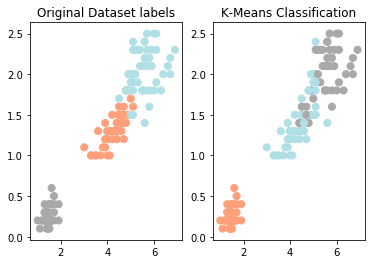

In [31]:
#Create dataframe for original data comparison

iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length','Sepal_Width',
        'Petal_Length','Petal_Width']
y.columns =['Targets']

# Set a variable color_theme to color our data point by their species abel

color_theme = np.array(['darkgray','lightsalmon','powderblue'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length,y= iris_df.Petal_Width,
            c=color_theme[iris.target],s=50)
plt.title('Original Dataset labels')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width,
            c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')
plt.show()

In above, the model appears to have predited cluster pretty accurately but the cluster themselves mislabeled. We will fix it by numpy choose function and reassign label names to predicted labels 

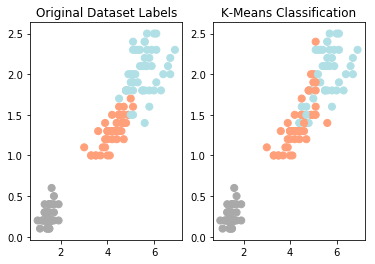

In [33]:
relabel = np.choose(clustering.labels_, [2, 0, 1]).astype(np.int64)

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Original Dataset Labels')

#Change the color_theme as per the new object 'relabel'.
plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[relabel], s=50)
plt.title('K-Means Classification')
plt.show()

It looks like our model predicted the data set very well but we will verify it quantitative. We'll use sklearn classifcation report to score the model.

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y,relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

   micro avg       0.83      0.83      0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



In [37]:

sm.accuracy_score(relabel,y)

0.8333333333333334

In [38]:
sm.confusion_matrix(relabel,y)

array([[50,  0,  0],
       [ 0, 39, 14],
       [ 0, 11, 36]])